Name: Sanad Masannat 

ID : 24217734


In [101]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [102]:
# Load dataset and check to see if read correctly
dataset = pd.read_csv("employees.csv")
#Just to see what shape the dataset is and check how many entires we have to cross reference later when we check how many null values
print("Shape of the dataset:", dataset.shape)  
dataset.head(15)


Shape of the dataset: (1365, 14)


,employee_id,department,job_level,age,salary,company_years,career_years,hiring_source,education_level,recently_promoted,distance,work_from_home,travel_frequently,leave
0,EMP0310,IT,Mid,37,105129.0,10,10.0,Agency,Undergrad Degree,True,3,False,Yes,False
1,EMP1273,Finance,Junior,61,31902.0,1,13.0,Direct,Undergrad Degree,True,39,False,No,False
2,EMP0391,Sales,Junior,43,29722.0,9,13.0,Referral,NaN,False,14,True,No,False
3,EMP1372,Finance,Junior,29,33196.0,1,1.0,Direct,Undergrad Degree,False,9,True,Yes,True
4,EMP1208,Finance,Junior,29,32885.0,1,6.0,Agency,Undergrad Degree,False,3,False,Yes,True
5,EMP0188,HR,Junior,43,50859.0,17,17.0,Direct Hire,Secondary,False,23,False,No,False
6,EMP1138,Sales,Senior,25,121964.0,1,1.0,Agency,MSc,False,13,False,No,True
7,EMP1034,IT,Junior,21,51255.0,2,2.0,Agency,PhD,False,103,True,No,True
8,EMP0276,Finance,Lead,56,201622.0,10,38.0,Referral,Undergrad Degree,False,18,False,No,False
9,EMP1393,HR,Junior,26,48963.0,1,1.0,Direct,Secondary,False,71,False,No,True


In [103]:

print("\nDataset Info:")
dataset.info()

# Check for missing values
print("\nCategories which have null values and how many:")
print(dataset.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        1365 non-null   object 
 1   department         1365 non-null   object 
 2   job_level          1365 non-null   object 
 3   age                1365 non-null   int64  
 4   salary             1365 non-null   float64
 5   company_years      1365 non-null   int64  
 6   career_years       1311 non-null   float64
 7   hiring_source      1365 non-null   object 
 8   education_level    1325 non-null   object 
 9   recently_promoted  1365 non-null   bool   
 10  distance           1365 non-null   int64  
 11  work_from_home     1333 non-null   object 
 12  travel_frequently  1365 non-null   object 
 13  leave              1365 non-null   bool   
dtypes: bool(2), float64(2), int64(3), object(7)
memory usage: 130.8+ KB

Categories which have null values an

In [104]:



# Statistical summary for numeric columns
print("\nStatistical Summary:")
print(dataset.describe())

# Unique values for categorical columns
categorical_columns = dataset.select_dtypes(include='object').columns
for col in categorical_columns:
    if col=='employee_id':
        continue
    print("\nUnique values in {col}:")
    print(dataset[col].value_counts())



Statistical Summary:
               age         salary  company_years  career_years     distance
count  1365.000000    1365.000000    1365.000000   1311.000000  1365.000000
mean     36.710623   75948.090110       5.761172      9.829138    19.129670
std       9.951374   54929.608786       5.508467      7.884555    25.753712
min      18.000000   11640.000000      -1.000000      1.000000     3.000000
25%      29.000000   33746.000000       1.000000      4.000000     3.000000
50%      36.000000   57739.000000       5.000000      8.000000     9.000000
75%      43.000000   97044.000000       8.000000     13.000000    22.000000
max      62.000000  244622.000000      34.000000     39.000000   121.000000

Unique values in {col}:
department
Sales      526
IT         310
HR         282
Finance    247
Name: count, dtype: int64

Unique values in {col}:
job_level
Junior    710
Mid       360
Senior    207
Lead       88
Name: count, dtype: int64

Unique values in {col}:
hiring_source
Direct         7

In [105]:
# Handle missing values

dataset.interpolate(method ='linear', limit_direction ='forward', inplace=True)

dataset['education_level'] = dataset['education_level'].replace('', 'Secondary').fillna('Secondary').replace('UG Degree', 'Undergrad Degree').replace('MSc','Masters')
dataset['work_from_home'] = dataset['work_from_home'].replace('', 'False').fillna('False')
dataset['travel_frequently'] = dataset['travel_frequently'].replace('N', 'No').replace('Y', 'Yes')
print("\nDataset after preprocessing:")
dataset.info()

dataset.head(15)



Dataset after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        1365 non-null   object 
 1   department         1365 non-null   object 
 2   job_level          1365 non-null   object 
 3   age                1365 non-null   int64  
 4   salary             1365 non-null   float64
 5   company_years      1365 non-null   int64  
 6   career_years       1365 non-null   float64
 7   hiring_source      1365 non-null   object 
 8   education_level    1365 non-null   object 
 9   recently_promoted  1365 non-null   bool   
 10  distance           1365 non-null   int64  
 11  work_from_home     1365 non-null   object 
 12  travel_frequently  1365 non-null   object 
 13  leave              1365 non-null   bool   
dtypes: bool(2), float64(2), int64(3), object(7)
memory usage: 130.8+ KB


C:\Users\sanad\AppData\Local\Temp\ipykernel_26800\3191818020.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dataset.interpolate(method ='linear', limit_direction ='forward', inplace=True)


,employee_id,department,job_level,age,salary,company_years,career_years,hiring_source,education_level,recently_promoted,distance,work_from_home,travel_frequently,leave
0,EMP0310,IT,Mid,37,105129.0,10,10.0,Agency,Undergrad Degree,True,3,False,Yes,False
1,EMP1273,Finance,Junior,61,31902.0,1,13.0,Direct,Undergrad Degree,True,39,False,No,False
2,EMP0391,Sales,Junior,43,29722.0,9,13.0,Referral,Secondary,False,14,True,No,False
3,EMP1372,Finance,Junior,29,33196.0,1,1.0,Direct,Undergrad Degree,False,9,True,Yes,True
4,EMP1208,Finance,Junior,29,32885.0,1,6.0,Agency,Undergrad Degree,False,3,False,Yes,True
5,EMP0188,HR,Junior,43,50859.0,17,17.0,Direct Hire,Secondary,False,23,False,No,False
6,EMP1138,Sales,Senior,25,121964.0,1,1.0,Agency,Masters,False,13,False,No,True
7,EMP1034,IT,Junior,21,51255.0,2,2.0,Agency,PhD,False,103,True,No,True
8,EMP0276,Finance,Lead,56,201622.0,10,38.0,Referral,Undergrad Degree,False,18,False,No,False
9,EMP1393,HR,Junior,26,48963.0,1,1.0,Direct,Secondary,False,71,False,No,True


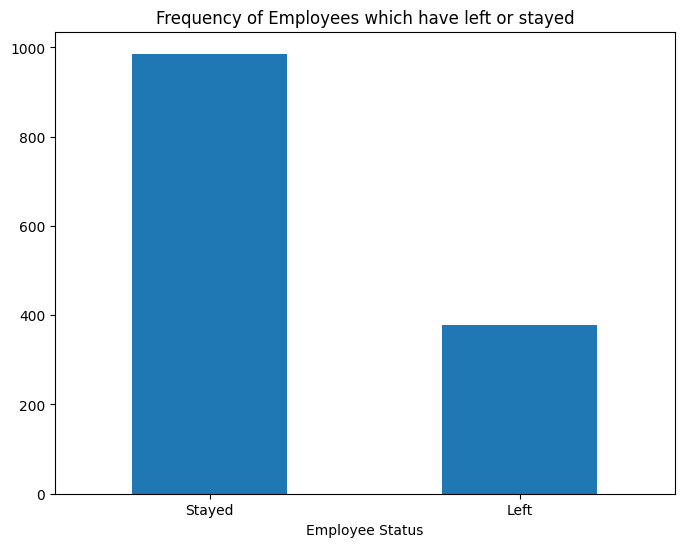

In [106]:
plt.figure(figsize=(8, 6))
dataset['leave'].value_counts().plot(kind='bar')
plt.title('Frequency of Employees which have left or stayed')
plt.xlabel('Employee Status')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'], rotation=0)
plt.show()


<Figure size 800x600 with 0 Axes>

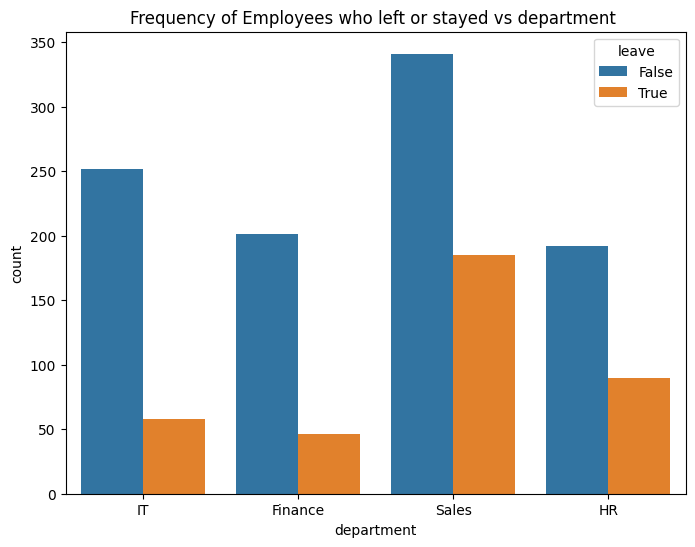

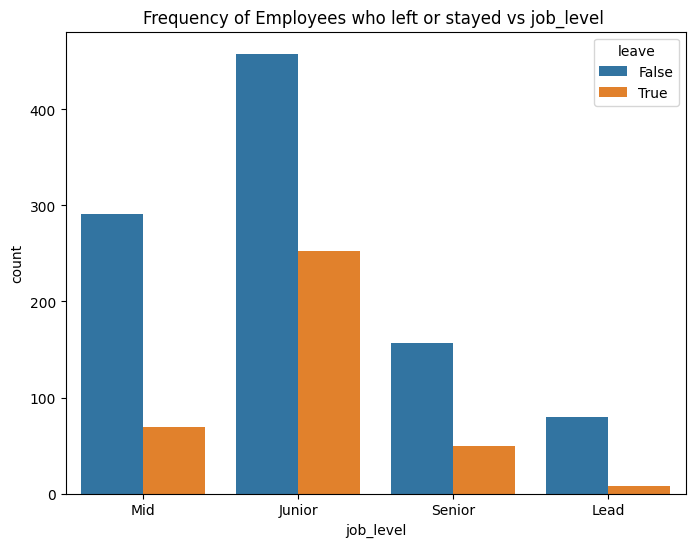

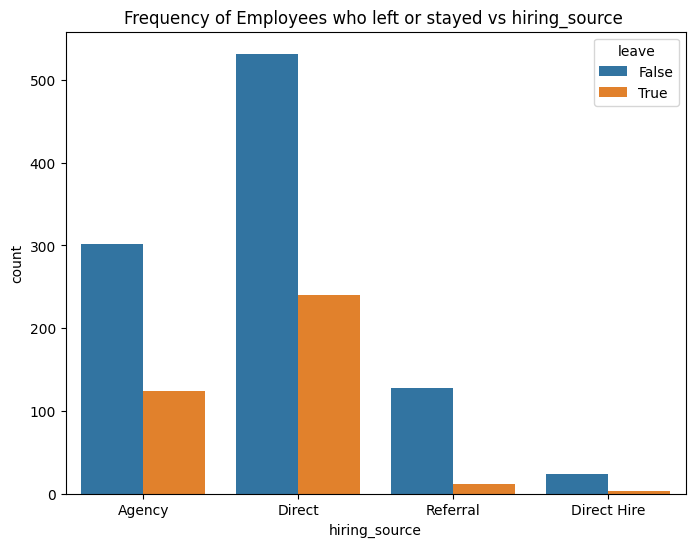

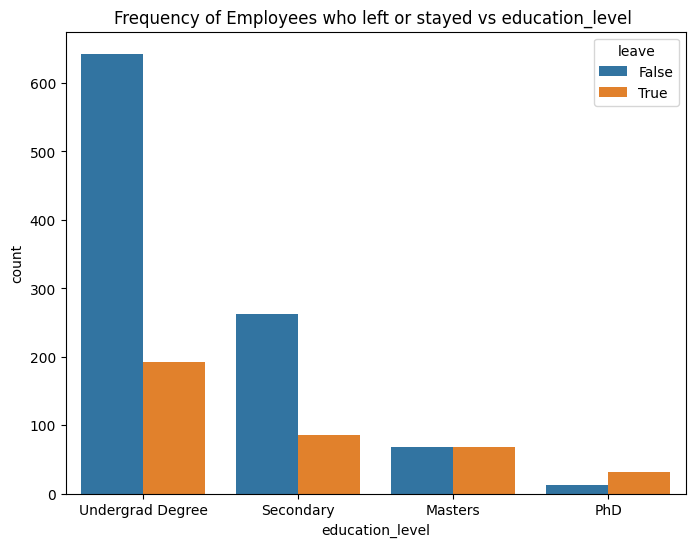

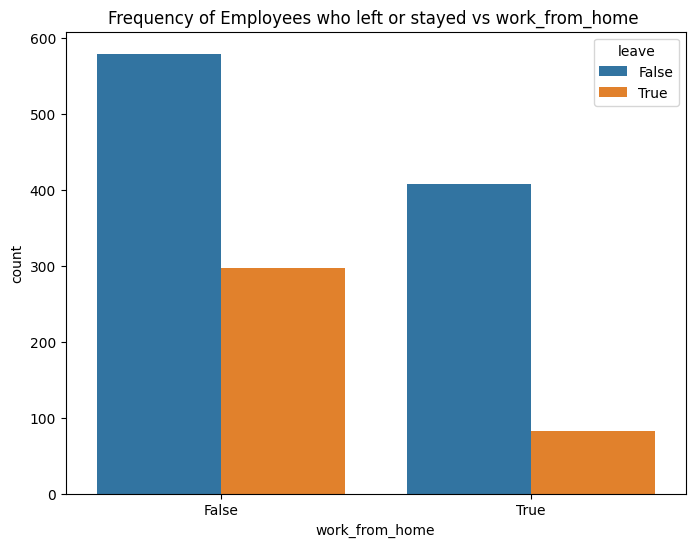

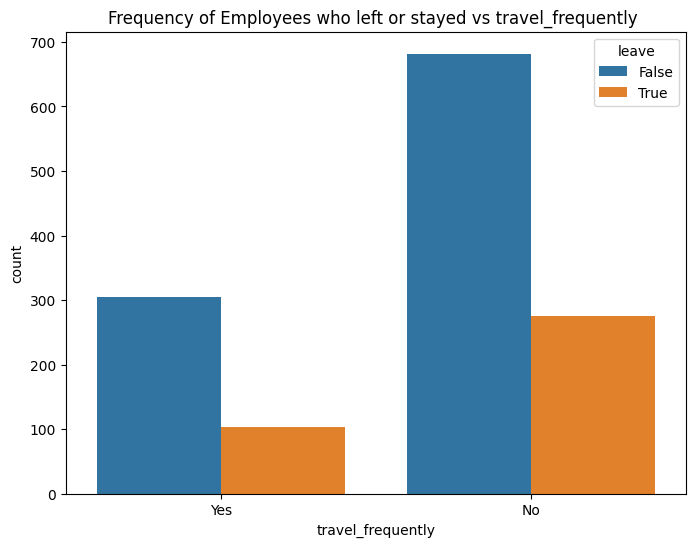

In [107]:
# Create bar plots for each categorical feature
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    if col == 'employee_id':
        continue
    sns.countplot(hue=dataset['leave'],data=dataset, x=col)
    plt.title(f'Frequency of Employees who left or stayed vs {col} ')
    plt.show()


Index(['age', 'salary', 'company_years', 'career_years', 'distance'], dtype='object')


C:\Users\sanad\AppData\Local\Temp\ipykernel_26800\604481174.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = dataset.groupby(['age_bins', 'leave']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

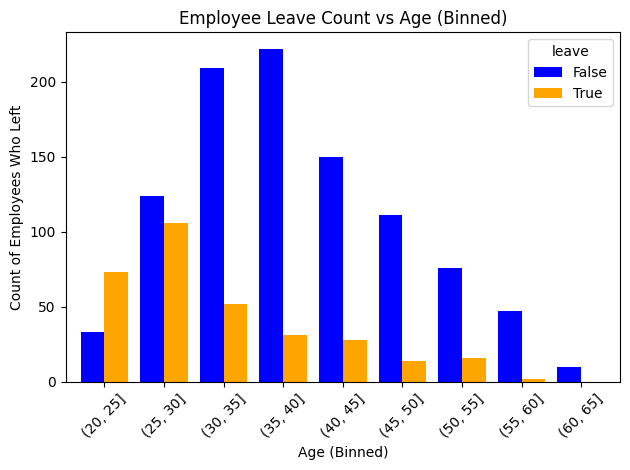

"\nfor col in numerical_columns:\n    if col == 'employee_id':\n        continue\n    plt.figure(figsize=(30, 30))\n\n    sns.countplot(data=dataset, x=col, hue='leave', palette='coolwarm')\n    plt.title(f'Relation between {col} and Leave')\n    plt.show()"

In [ ]:
# Create bar plots for each numerical feature
numerical_columns = dataset.select_dtypes(include=['int64','float64']).columns
print(numerical_columns)
# Create bins for 'age'
'''
age_bin_edges = range(20, int(dataset['age'].max()) + 5, 5)  # Adjust range and step size as needed
dataset['age_bins'] = pd.cut(dataset['age'], bins=age_bin_edges)

grouped_data = dataset.groupby(['age_bins', 'leave']).size().unstack(fill_value=0)
# Plot the binned bar graph
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', color=['blue','orange'], width=0.8)
plt.title('Employee Leave Count vs Age (Binned)')
plt.xlabel('Age (Binned)')
plt.ylabel('Count of Employees Who Left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
'''
for col in numerical_columns:
    if col == 'employee_id':
        continue
    plt.figure(figsize=(30, 30))

    sns.countplot(data=dataset, x=col, hue='leave', palette='coolwarm')
    plt.title(f'Relation between {col} and Leave')
    plt.show()